<a href="https://colab.research.google.com/github/sebastian-dv/CSE-151A-Project/blob/main/Data_Exploration_%26_Initial_Preprocessing_Milestone_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE 151A Group Project
# Names

- Pranav Prabu
- Sebastian Diaz
- Jou-Chih Chang
- Juan Yin
- Irving Zhao
- Xianzhe Guo
- Tiankuo Li

# Abstract
This project looks to investigate and find key factors that exist in determining the different causes and factors that hint towards the existence of a specific disease. This project will be accomplished by using the dataset SUPPORT2 in the UC Irvine Machine Learning Repository, using discriminative factors such as blood type, chemical levels, and more to isolate correlations. This will be done through the 42 features offered by the set, looking to differentiate between nine disease categories: acute respiratory failure, chronic obstructive pulmonary disease, congestive heart failure, liver disease, coma, colon cancer, lung cancer, multiple organ system failure with malignancy, and multiple organ system failure with sepsis. We will use the feature set from the listed dataset to find specific relations between certain features that will indicate towards the existence of critical diseases found today.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Data Wrangling/Cleaning and Exploratory Data Analysis (EDA)

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
support2 = fetch_ucirepo(id=880)

First we take a look at the descriptions of the variables in this dataset:

In [4]:
pd.set_option('display.max_colwidth', None)

full_info = pd.DataFrame({
    'Variable Name': support2.variables['name'],
    'Description': support2.variables['description']
})
full_info

,Variable Name,Description
0,id,None
1,age,Age of the patients in years
2,death,Death at any time up to National Death Index (NDI) data on 31 of December of 1994. Some patients are discharged before the end of the study and are not followed up. The authors looked up the information about death.
3,sex,"Gender of the patient. Listed values are {male, female}."
4,hospdead,Death in hospital
5,slos,Days from Study Entry to Discharge
6,d.time,Days of follow-up
7,dzgroup,"The patient's disease sub category amogst ARF/MOSF w/Sepsis, CHF, COPD, Cirrhosis, Colon Cancer, Coma, Lung Cancer, MOSF w/Malig."
8,dzclass,"The patient's disease category amongst ""ARF/MOSF"", ""COPD/CHF/Cirrhosis"", ""Cancer"", ""Coma""."
9,num.co,The number of simultaneous diseases (or comorbidities) exhibited by the patient. Values are ordinal with higher values indicating worse condition and chances of survival.


In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/static/public/880/data.csv')

df = df[['age','sex','death','dzgroup','scoma','race','sps','aps','diabetes','dementia','ca','meanbp','wblc','hrt','resp','temp','pafi','alb','bili','crea','sod','ph']]
df

,age,sex,death,dzgroup,scoma,race,sps,aps,diabetes,dementia,...,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph
0,62.84998,male,0,Lung Cancer,0.0,other,33.898438,20.0,0,0,...,6.000000,69.0,22.0,36.00000,388.00000,1.799805,0.199982,1.199951,141.0,7.459961
1,60.33899,female,1,Cirrhosis,44.0,white,52.695312,74.0,0,0,...,17.097656,112.0,34.0,34.59375,98.00000,NaN,NaN,5.500000,132.0,7.250000
2,52.74698,female,1,Cirrhosis,0.0,white,20.500000,45.0,0,0,...,8.500000,88.0,28.0,37.39844,231.65625,NaN,2.199707,2.000000,134.0,7.459961
3,42.38498,female,1,Lung Cancer,0.0,white,20.097656,19.0,0,0,...,9.099609,88.0,32.0,35.00000,NaN,NaN,NaN,0.799927,139.0,NaN
4,79.88495,female,0,ARF/MOSF w/Sepsis,26.0,white,23.500000,30.0,0,0,...,13.500000,112.0,20.0,37.89844,173.31250,NaN,NaN,0.799927,143.0,7.509766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9100,66.07300,male,0,ARF/MOSF w/Sepsis,0.0,white,16.296875,22.0,0,0,...,7.399414,104.0,22.0,35.69531,280.00000,3.699707,0.399963,1.099854,131.0,7.459961
9101,55.15399,female,0,Coma,41.0,white,25.796875,31.0,0,0,...,NaN,0.0,8.0,38.59375,218.50000,NaN,NaN,5.899414,135.0,7.289062
9102,70.38196,male,0,ARF/MOSF w/Sepsis,0.0,white,22.699219,39.0,0,0,...,8.398438,83.0,24.0,36.69531,180.00000,NaN,0.399963,2.699707,139.0,7.379883
9103,47.01999,male,1,MOSF w/Malig,0.0,white,40.195312,51.0,0,0,...,7.599609,110.0,24.0,36.39844,428.56250,1.199951,0.399963,3.500000,135.0,7.469727


In [6]:
df.shape

(9105, 22)

In [7]:
print("Number of observations:", len(df))

Number of observations: 9105


In [8]:
df.isnull().sum()

age            0
sex            0
death          0
dzgroup        0
scoma          1
race          42
sps            1
aps            1
diabetes       0
dementia       0
ca             0
meanbp         1
wblc         212
hrt            1
resp           1
temp           1
pafi        2325
alb         3372
bili        2601
crea          67
sod            1
ph          2284
dtype: int64

In [9]:
print(df.dzgroup.unique())
print(df.race.unique())
print(df.ca.unique())

['Lung Cancer' 'Cirrhosis' 'ARF/MOSF w/Sepsis' 'Coma' 'CHF' 'Colon Cancer'
 'COPD' 'MOSF w/Malig']
['other' 'white' 'black' 'hispanic' 'asian' nan]
['metastatic' 'no' 'yes']


In [10]:
df['sex'].replace('female', 0, inplace=True)
df['sex'].replace('male', 1, inplace=True)

<ipython-input-11-c47c7f29ada0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, center = 0)


<Axes: >

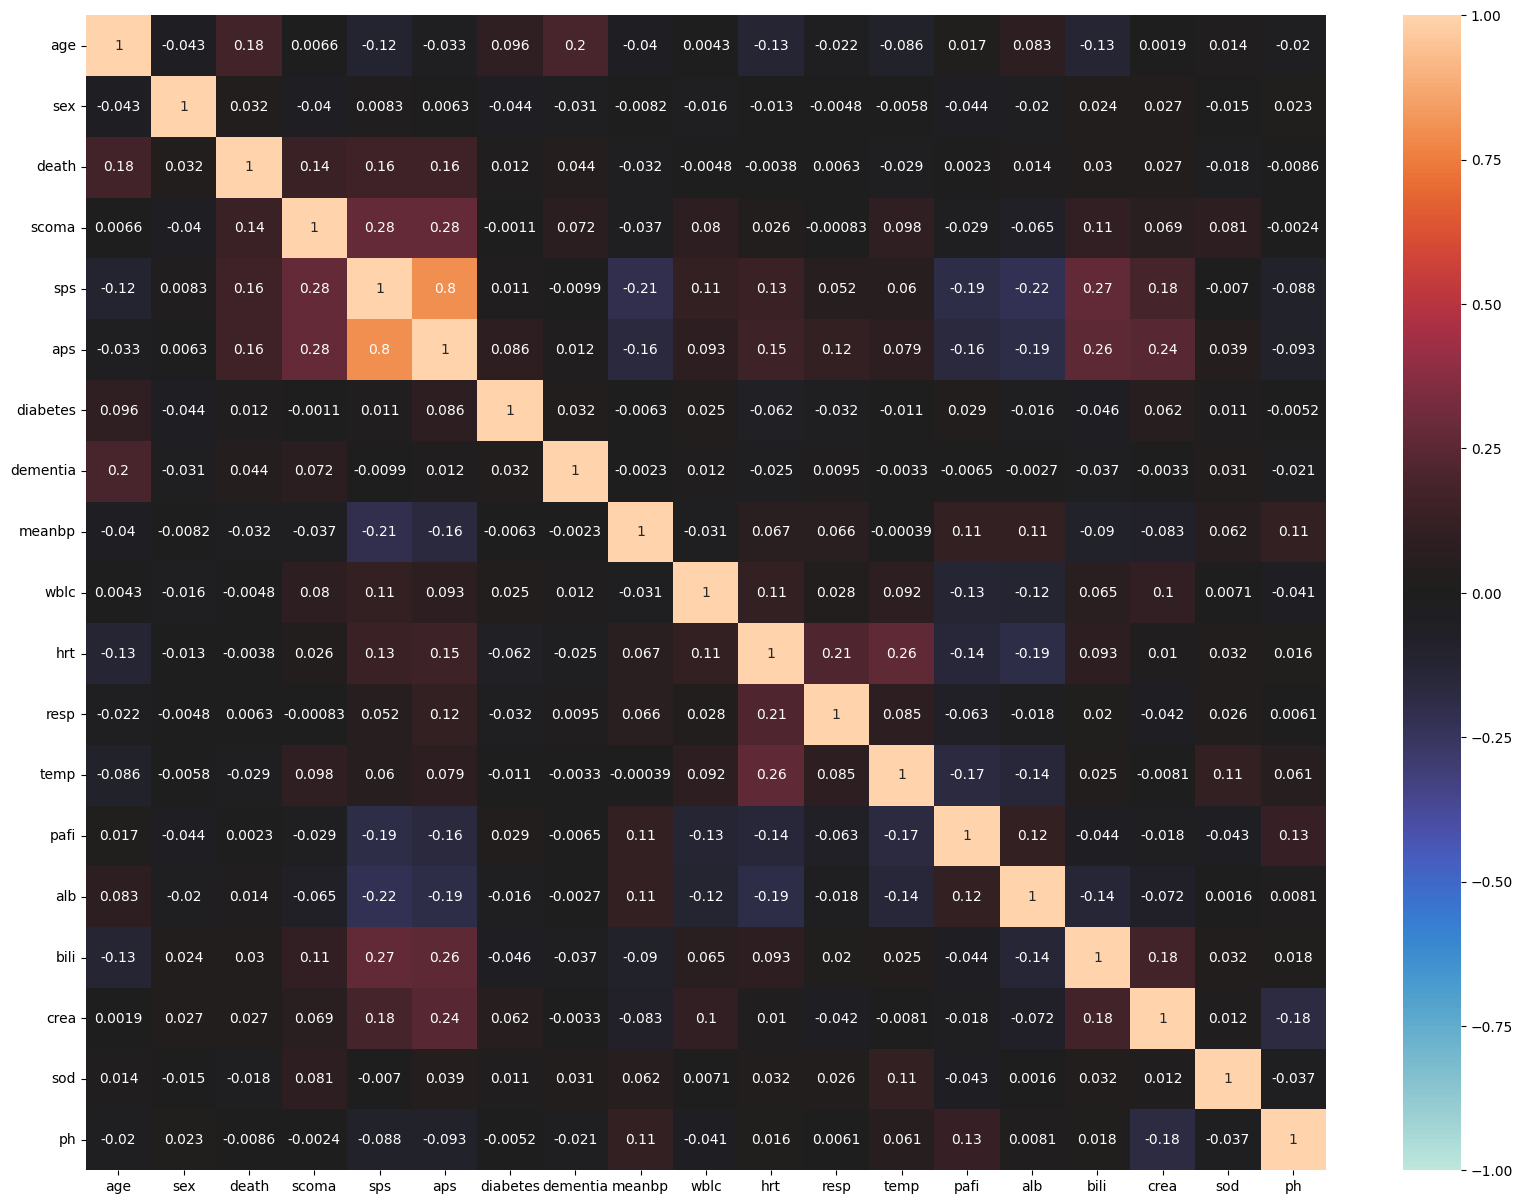

In [11]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, center = 0)

<BarContainer object of 8 artists>

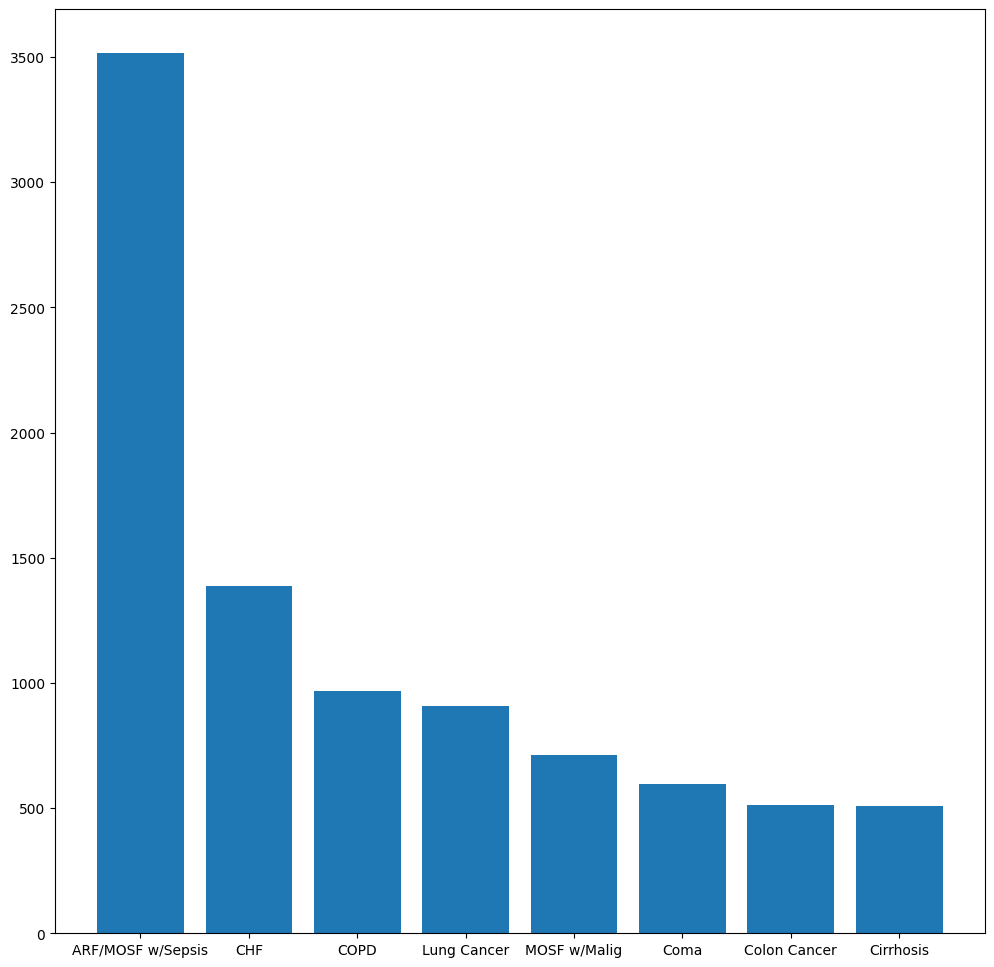

In [12]:
count = df['dzgroup'].value_counts()
plt.figure(figsize=(12, 12))
plt.bar(count.index, count.values)

In [14]:
ohe = OneHotEncoder()
list1 = ['dzgroup', 'race', 'ca']
for i in list1:
  myohedzgroup = ohe.fit_transform(df[i].values.reshape(-1,1)).toarray()
  myohedzgroup=pd.DataFrame(myohedzgroup, columns=ohe.categories_[0])
  df=df.drop([i], axis=1)
  df=pd.concat([df,myohedzgroup],axis=1)

df = df.dropna(axis = 0, how = 'any')
df.drop(df.columns[32], axis=1)

,age,sex,death,scoma,sps,aps,diabetes,dementia,meanbp,wblc,...,Lung Cancer,MOSF w/Malig,asian,black,hispanic,other,white,metastatic,no,yes
0,62.84998,1,0,0.0,33.898438,20.0,0,0,97.0,6.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6,62.37097,1,1,0.0,17.296875,46.0,0,0,78.0,11.699219,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
17,63.66299,0,1,26.0,40.296875,58.0,0,0,69.0,30.097656,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
22,49.61298,0,0,0.0,31.699219,42.0,0,0,67.0,11.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
25,53.84000,1,1,0.0,14.199219,16.0,0,0,134.0,7.799805,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9091,79.17596,1,0,9.0,22.097656,28.0,0,0,80.0,15.798828,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9099,68.61597,0,0,0.0,15.298828,19.0,0,0,71.0,12.599609,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9100,66.07300,1,0,0.0,16.296875,22.0,0,0,109.0,7.399414,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9103,47.01999,1,1,0.0,40.195312,51.0,0,0,99.0,7.599609,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
print(df.isnull().any().sum())

0
